<a href="https://colab.research.google.com/github/harsha-vardhan-reddy-07/time_series_project/blob/main/Price_prediction_TimeSeries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Time series Project:

fill the data about this project


### Let's import the dataset from kaggle

In [1]:
## Firstly, generate a "API Token" in kaggle from the profile section. It downloads a kaggle.json file.
from google.colab import files
files.upload()

In [2]:
! mkdir drive/MyDrive/.kaggle
! cp kaggle.json drive/MyDrive/.kaggle

In [3]:
## let's copy the uploaded kaggle.json file into our desired destination
! cp kaggle.json drive/MyDrive/kaggle_datasets

In [4]:
# Let's give permission to access the dataset from kaggle
! chmod 600 /root/.kaggle/kaggle.json

In [5]:
## Let's download the dataset (copy the command from kaggle dataset)
! kaggle competitions download -c bluebook-for-bulldozers

In [6]:
# Now we got our dataset and let's move it to our desired location
! mv bluebook-for-bulldozers.zip drive/MyDrive/DataSets/TimeSeries_dataset/

In [7]:
## Let's unzip
! unzip drive/MyDrive/DataSets/TimeSeries_dataset/bluebook-for-bulldozers.zip -d drive/MyDrive/DataSets/TimeSeries_dataset

In [8]:
! unzip drive/MyDrive/DataSets/TimeSeries_dataset/Train.zip -d drive/MyDrive/DataSets/TimeSeries_dataset

## Let's start working on our data

In [9]:
## Import all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
df = pd.read_csv('drive/MyDrive/DataSets/TimeSeries_dataset/TrainAndValid.csv', low_memory = False)

In [11]:
df

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412693,6333344,10000.0,1919201,21435,149,2.0,2005,NaN,NaN,3/7/2012 0:00,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
412694,6333345,10500.0,1882122,21436,149,2.0,2005,NaN,NaN,1/28/2012 0:00,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
412695,6333347,12500.0,1944213,21435,149,2.0,2005,NaN,NaN,1/28/2012 0:00,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
412696,6333348,10000.0,1794518,21435,149,2.0,2006,NaN,NaN,3/7/2012 0:00,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [13]:
df['saledate']

0         11/16/2006 0:00
1          3/26/2004 0:00
2          2/26/2004 0:00
3          5/19/2011 0:00
4          7/23/2009 0:00
               ...       
412693      3/7/2012 0:00
412694     1/28/2012 0:00
412695     1/28/2012 0:00
412696      3/7/2012 0:00
412697     1/28/2012 0:00
Name: saledate, Length: 412698, dtype: object

In [14]:
## let's import our dataset again, but this time making saledate dtype to datetime64[ns] (it let's us to perform various operations on date)
df = pd.read_csv('drive/MyDrive/DataSets/TimeSeries_dataset/TrainAndValid.csv', low_memory = False, parse_dates = ['saledate'])

In [15]:
df['saledate']

0        2006-11-16
1        2004-03-26
2        2004-02-26
3        2011-05-19
4        2009-07-23
            ...    
412693   2012-03-07
412694   2012-01-28
412695   2012-01-28
412696   2012-03-07
412697   2012-01-28
Name: saledate, Length: 412698, dtype: datetime64[ns]

### Let's get some insights of the data visually

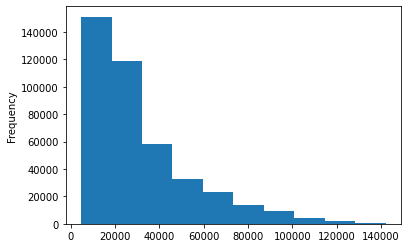

In [16]:
df['SalePrice'].plot.hist();

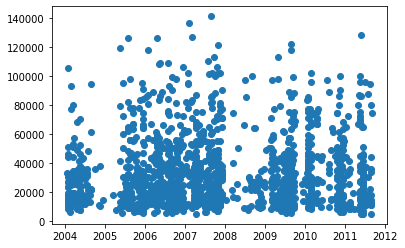

In [17]:
plt.scatter(df['saledate'][:1500], df['SalePrice'][:1500]);

As we're working on a time series data, it would be a better practice to sort our data w.r.t the date(time)

In [18]:
df.sort_values(by=['saledate'], inplace = True, ascending= True)

In [19]:
df.saledate.head()

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
Name: saledate, dtype: datetime64[ns]

### Create new features

Let's create new features from the "saledate" to make our model work better

In [20]:
df['saleYear'] = df.saledate.dt.year
df['saleYear']

205615    1989
274835    1989
141296    1989
212552    1989
62755     1989
          ... 
410879    2012
412476    2012
411927    2012
407124    2012
409203    2012
Name: saleYear, Length: 412698, dtype: int64

In [21]:
df['saleMonth'] = df.saledate.dt.month
df['saleDay'] = df.saledate.dt.day
df['saleDayOfWeek'] = df.saledate.dt.day_of_week
df['saleDayOfYear'] = df.saledate.dt.day_of_year

In [22]:
df.T

,205615,274835,141296,212552,62755,54653,81383,204924,135376,113390,...,409202,408976,411695,411319,408889,410879,412476,411927,407124,409203
SalesID,1646770,1821514,1505138,1671174,1329056,1301884,1379228,1645390,1493279,1449549,...,6283634,6282337,6311321,6306476,6281219,6302984,6324811,6313029,6266251,6283635
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0,23500.0,31000.0,11750.0,63000.0,13000.0,...,35000.0,7500.0,13000.0,53000.0,39000.0,16000.0,6000.0,16000.0,55000.0,34000.0
MachineID,1126363,1194089,1473654,1327630,1336053,1182999,1082797,1527216,1363756,1289412,...,1930870,1928688,1823846,1278794,1792049,1915521,1919104,1918416,509560,1869284
ModelID,8434,10150,4139,8591,4089,4123,7620,8202,2759,3356,...,4701,22072,17311,9114,13976,5266,19330,17244,3357,4701
datasource,132,132,132,132,132,132,132,132,132,132,...,149,149,149,149,149,149,149,149,149,149
auctioneerID,18.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,...,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984,1976,1986,1970,1987,1966,...,1998,2005,2005,2004,2000,2001,2004,2004,1993,1000
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,...,2012-04-28 00:00:00,2012-04-28 00:00:00,2012-04-28 00:00:00,2012-04-28 00:00:00,2012-04-28 00:00:00,2012-04-28 00:00:00,2012-04-28 00:00:00,2012-04-28 00:00:00,2012-04-28 00:00:00,2012-04-28 00:00:00


In [23]:
## now let's drop the saledate column
df.drop('saledate', axis=1, inplace=True)

In [24]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayOfWeek,saleDayOfYear
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,TD20,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,17,1,17
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,A66,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,D7G,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,31,1,31
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,A62,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,D3B,...,None or Unspecified,PAT,Lever,NaN,NaN,1989,1,31,1,31


In [25]:
## Let's create a copy of our data (as a spare if we make any mistake while manipulation)
df_origin = df.copy()
df_origin.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayOfWeek,saleDayOfYear
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,TD20,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,17,1,17
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,A66,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,D7G,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,31,1,31
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,A62,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,D3B,...,None or Unspecified,PAT,Lever,NaN,NaN,1989,1,31,1,31


### Data Preprocessing

It's time for data preprocessing and let's do the following:
1. convert strings into categories
2. fill the missing values

In [26]:
## let's find which columns has strings

for label, content in df.items():
  if pd.api.types.is_string_dtype(content):
    print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [27]:
## Now let's convert all those strings into categories
for label, content in df.items():
  if pd.api.types.is_string_dtype(content):
    df[label] = content.astype('category').cat.as_ordered()

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor       

In [29]:
## let's see how categories work
df['state'].cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

In [30]:
df['state']

205615         Texas
274835       Florida
141296       Florida
212552       Florida
62755        Florida
             ...    
410879    California
412476    California
411927    California
407124    California
409203    California
Name: state, Length: 412698, dtype: category
Categories (53, object): ['Alabama' < 'Alaska' < 'Arizona' < 'Arkansas' ... 'Washington DC' <
                          'West Virginia' < 'Wisconsin' < 'Wyoming']

In [31]:
df['state'].cat.codes

205615    43
274835     8
141296     8
212552     8
62755      8
          ..
410879     4
412476     4
411927     4
407124     4
409203     4
Length: 412698, dtype: int8

### It's time for filling missing values

In [32]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension             386715
Blade_Width         

In [33]:
## Firstly, let's fill the numeric values

for label, content in df.items():
  if pd.api.types.is_numeric_dtype(content):
    if pd.isnull(content).sum():
      print(label)

auctioneerID
MachineHoursCurrentMeter


In [34]:
## let's fill the missing values with median

for label, content in df.items():
  if pd.api.types.is_numeric_dtype(content):
    if pd.isnull(content).sum():
      ## let's add another column to represent that a value was missing in that place
      df[label+'_is_missing'] = pd.isnull(content)
      #let's fill the median
      df[label] = content.fillna(content.median()) 

## Here, we use median instead of mean b'coz median is more roboust and it depends upon the max count of elements with a value 
## in simple words, for 10 items with 9 having a value of 5 and 1 with 5000, median will be 5 whereas mean will be around 500

In [35]:
for label, content in df.items():
  if pd.api.types.is_numeric_dtype(content):
    if pd.isnull(content).sum():
      print(label)

#### It's time to work on categorical data

In [36]:
## let's convert categories into numeric

for label, content in df.items():
  if not pd.api.types.is_numeric_dtype(content):
    ## let's add another column to represent that a value was missing in that place
    df[label+'_is_missing'] = pd.isnull(content)
    ## Turn categories into numbers and add 1
    df[label] = pd.Categorical(content).codes + 1

    ## Here, if there is a null value, then it returns -1. So, we add 1 to all to make -1 => 0

In [37]:
df.isna().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 103, dtype: int64

In [38]:
df.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
...,...,...,...,...,...
Backhoe_Mounting_is_missing,False,True,False,True,False
Blade_Type_is_missing,False,True,False,True,False
Travel_Controls_is_missing,False,True,False,True,False
Differential_Type_is_missing,True,False,True,False,True


### It's time for model training

In [39]:
## Firstly, let's split the data into train and valid sets
## We have data from 1989 to april 2021, so let's take data of 2012 as valid set

valid_set = df[df['saleYear'] == 2012]
train_set = df[df['saleYear'] != 2012 ]

In [40]:
valid_set['saleYear'].head()

405675    2012
401133    2012
406076    2012
409018    2012
409026    2012
Name: saleYear, dtype: int64

In [41]:
x_train, y_train = train_set.drop('SalePrice', axis = 1), train_set.SalePrice

x_valid, y_valid = valid_set.drop('SalePrice', axis = 1), valid_set.SalePrice

In [42]:
x_train.shape, y_train.shape, x_valid.shape, y_valid.shape

((401125, 102), (401125,), (11573, 102), (11573,))

### ML Models
We need to choose the best model for our data from the available models.
Let's choose the best from the following models:
* Linear Rgressor
* RandomForest Regressor
* SGD Regressor
* KNeighborsRegressor

In [43]:
## let's import the models

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor

### Evaluation Metrics
Here we consider the following as evaluation metrics:
* R2 Score
* Mean Absolute Error
* Mean Squared Error

In [44]:
## Let's create an evaluation function
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

def Eval_Scores(y_valid, x_valid, model):
  print(f"The model is {model}")
  y_pred = model.predict(x_valid)
  scores = {"R2 Score": r2_score(y_valid, y_pred),
            "MAE": mean_absolute_error(y_valid, y_pred),
            "MSE": mean_squared_error(y_valid, y_pred)}
  
  return scores

In [45]:
## Let's evalute the models we choose to pick the best

LRModel = LinearRegression().fit(x_train[:10000], y_train[:10000])
Eval_Scores(y_valid[:5000], x_valid[:5000], LRModel)

The model is LinearRegression()


{'R2 Score': -22.88098619424877,
 'MAE': 65992.97849183211,
 'MSE': 18465876099.7505}

In [46]:
RFRModel = RandomForestRegressor().fit(x_train[:10000], y_train[:10000])
Eval_Scores(y_valid[:5000], x_valid[:5000], RFRModel)

The model is RandomForestRegressor()


{'R2 Score': -0.562074458201034,
 'MAE': 27502.226639999997,
 'MSE': 1207867764.299948}

In [47]:

SGDModel = SGDRegressor().fit(x_train[:10000], y_train[:10000])
Eval_Scores(y_valid[:5000], x_valid[:5000], SGDModel)

The model is SGDRegressor()


{'R2 Score': -4.974886207855674e+32,
 'MAE': 5.71776818988573e+20,
 'MSE': 3.846810662565702e+41}

In [48]:
KNRModel = KNeighborsRegressor().fit(x_train[:10000], y_train[:10000])
Eval_Scores(y_valid[:5000], x_valid[:5000], KNRModel)

The model is KNeighborsRegressor()


{'R2 Score': -0.348419153745982, 'MAE': 22096.94464, 'MSE': 1042659663.2596481}

Here, we can see that the Random forest regressor suites best for our data. So, let's tune our model further

In [49]:
RFRModel.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [50]:
## let's use RandomizedSearchCV for identifying best parameters

from sklearn.model_selection import RandomizedSearchCV

param_grid = {'n_estimators': np.arange(10, 100, 5),
          'max_depth': [None, 2, 3, 5, 10],
          'min_samples_split': np.arange(2,20,2),
          'min_samples_leaf': np.arange(1,20,2),
          'max_features': [0.5, 1, 'auto', 'sqrt'],
          'max_samples': [20000]}

rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=1, random_state=42), param_distributions = param_grid, n_iter = 10, cv = 5, verbose = True)
rs_model.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=1, random_state=42),
                   param_distributions={'max_depth': [None, 2, 3, 5, 10],
                                        'max_features': [0.5, 1, 'auto',
                                                         'sqrt'],
                                        'max_samples': [20000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90,
       95])},
                   verbose=True)

In [51]:
rs_model.best_params_

{'n_estimators': 40,
 'min_samples_split': 18,
 'min_samples_leaf': 1,
 'max_samples': 20000,
 'max_features': 'sqrt',
 'max_depth': None}

In [60]:
## Now let's work on our complete data with the tunes parameters

model = RandomForestRegressor(n_estimators = 40,
                              min_samples_split = 18,
                              min_samples_leaf = 1,
                              max_features = 'sqrt',
                              max_depth = None).fit(x_train, y_train)

In [61]:
Eval_Scores(y_valid, x_valid, model)

The model is RandomForestRegressor(max_features='sqrt', min_samples_split=18,
                      n_estimators=40)


{'R2 Score': 0.8528801117464326,
 'MAE': 6761.494162629774,
 'MSE': 101052592.78730679}

### Conclusion
By tuning the hyperparameters, we're able to achieve the R2 Score of 0.85. But still, our model can be improved and acheiving an R2 score of >0.9 will be ideal here.